In [10]:
from data_preporation_field_scale import field_scale
import geopandas as gpd
import geemap
import ee
import datetime
import pandas as pd
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [16]:
region_geometry = gpd.read_file('vector_data/our_fields_for_animation.geojson')
ROIs = gpd.read_file('vector_data/our_fields_for_animation.geojson')
dates = [(f'20{i}-01-01',f'20{i}-12-31') for i in range(19,22)]
import geemap

In [18]:
dates

[('2019-01-01', '2019-12-31'),
 ('2020-01-01', '2020-12-31'),
 ('2021-01-01', '2021-12-31')]

('2019-01-01', '2019-12-31')
  Местное время в Буденновске    T     Po      P   Pa   U  \
0            31.12.2019 21:00 -1.0  749.0  761.8 -0.7  99   
1            31.12.2019 18:00 -0.8  749.7  762.4 -0.7  94   
2            31.12.2019 15:00  3.1  750.4  763.0 -1.5  82   
3            31.12.2019 12:00  2.5  751.9  764.5 -1.7  82   
4            31.12.2019 09:00  0.5  753.6  766.3 -0.7  96   
5            31.12.2019 06:00  0.0  754.3  767.1 -1.2  94   
6            31.12.2019 03:00 -0.1  755.5  768.3 -1.2  84   
7            31.12.2019 00:00  0.0  756.7  769.5 -1.0  83   
8            30.12.2019 21:00  0.2  757.7  770.5 -0.5  79   
9            30.12.2019 18:00  0.7  758.2  771.1  0.0  77   

                                    DD  Ff  ff10  ff3  ...   Cm   Ch    VV  \
0       Ветер, дующий с юго-юго-запада   3   NaN  NaN  ...  NaN  NaN   0.5   
1                  Ветер, дующий с юга   1   NaN  NaN  ...  NaN  NaN   4.0   
2               Ветер, дующий с запада   3   NaN  NaN  ...  NaN  

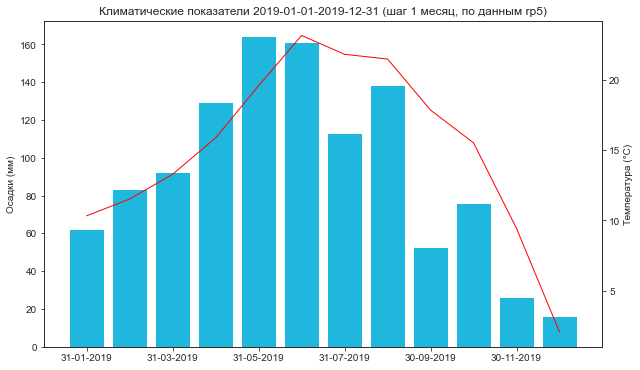

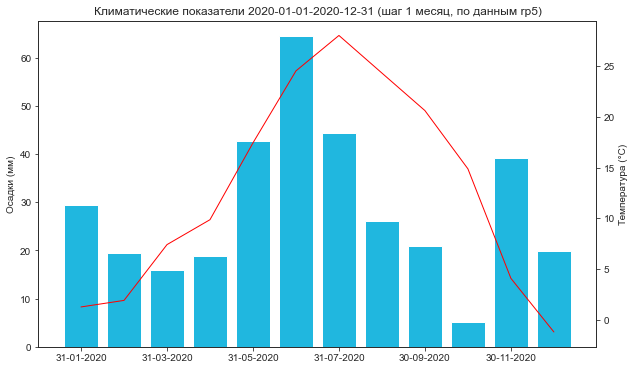

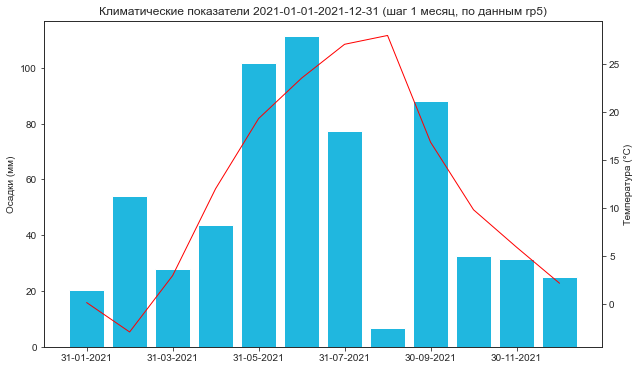

In [19]:

climat_df = pd.DataFrame()
for i in dates:
    print(i)
    for_NDTI = field_scale(i[0] , i[1] , ROIs , region_geometry)
    little_climat = for_NDTI.anual_weather(download = 'yes',plot_data ='yes')
    climat_df = climat_df.append(little_climat)


In [45]:
climat_df['date'] = pd.to_datetime(climat_df['date'])


In [131]:
def climatic_values(df):
    max_t_date = df[df.mean_temperature ==   df.mean_temperature.max()]["date"].values[0] #дата максимальной T
    max_t_ = df[df.mean_temperature ==   df.mean_temperature.max()]["mean_temperature"].values[0] #максимальная T
    min_t_date = df[df.mean_temperature ==   df.mean_temperature.min()]["date"].values[0] #дата минимальной T
    min_t_ = df[df.mean_temperature ==   df.mean_temperature.min()]["mean_temperature"].values[0] #минимальная T
    sum_percepetation = df["sum_percepetation"].sum()# сумма осадков за года 
    mean_temperature = df["mean_temperature"].mean() # среднегодовая температура 
    max_perc_date = df[df.sum_percepetation ==   df.sum_percepetation.max()]["date"].values[0] #дата максимальной осадки
    max_perc_ = df[df.sum_percepetation ==   df.sum_percepetation.max()]["mean_temperature"].values[0] #максимальная осадки
    snow_days = df["snow"][df["snow"]> 0].count()# колличество дней со снежным покрытием 
    
    return([max_t_date,max_t_,min_t_date, min_t_,sum_percepetation, mean_temperature, max_perc_date , max_perc_ , snow_days])

def climate_report(year):
    df = climat_df[climat_df['date'].dt.year == year].copy()
    df_veg_season = df[(df["date"]>= f'{year}-04-13') & (df["date"] <= f'{year}-10-18')].copy()
    climatic_list = climatic_values(df)
    climatic_list_names = ['время макс температуры',
                            'максимальная температура',
                            'время мин температуры',
                            'мин температура',
                            'сумма осадков',
                            'средняя температура',
                            'дата выпадения макс осадков',
                            'максимальный объем осадков', 
                            'колличество дней с снеговым покровом']


    climatic_list_veg_season = climatic_values(df_veg_season)               

    print('годовые показатели', dict(zip(climatic_list_names, climatic_list)), sep ='\n')

    print('показатели за вег сезон', dict(zip(climatic_list_names, climatic_list_veg_season)), sep ='\n')



In [133]:
climate_report(2019)

годовые показатели
{'время макс температуры': numpy.datetime64('2019-06-23T00:00:00.000000000'), 'максимальная температура': 30.0125, 'время мин температуры': numpy.datetime64('2019-08-01T00:00:00.000000000'), 'мин температура': -6.8, 'сумма осадков': 327.0, 'средняя температура': 12.301501956947163, 'дата выпадения макс осадков': numpy.datetime64('2019-07-20T00:00:00.000000000'), 'максимальный объем осадков': 24.275000000000002, 'колличество дней с снеговым покровом': 28}
показатели за вег сезон
{'время макс температуры': numpy.datetime64('2019-06-23T00:00:00.000000000'), 'максимальная температура': 30.0125, 'время мин температуры': numpy.datetime64('2019-08-01T00:00:00.000000000'), 'мин температура': -6.8, 'сумма осадков': 222.5, 'средняя температура': 17.172411186696902, 'дата выпадения макс осадков': numpy.datetime64('2019-07-20T00:00:00.000000000'), 'максимальный объем осадков': 24.275000000000002, 'колличество дней с снеговым покровом': 7}


In [134]:
climate_report(2020)

годовые показатели
{'время макс температуры': numpy.datetime64('2020-07-07T00:00:00.000000000'), 'максимальная температура': 32.35, 'время мин температуры': numpy.datetime64('2020-11-02T00:00:00.000000000'), 'мин температура': -9.25, 'сумма осадков': 284.1, 'средняя температура': 12.787909836065573, 'дата выпадения макс осадков': numpy.datetime64('2020-07-17T00:00:00.000000000'), 'максимальный объем осадков': 25.950000000000003, 'колличество дней с снеговым покровом': 25}
показатели за вег сезон
{'время макс температуры': numpy.datetime64('2020-07-07T00:00:00.000000000'), 'максимальная температура': 32.35, 'время мин температуры': numpy.datetime64('2020-10-02T00:00:00.000000000'), 'мин температура': -8.7125, 'сумма осадков': 168.4, 'средняя температура': 17.535648148148148, 'дата выпадения макс осадков': numpy.datetime64('2020-07-17T00:00:00.000000000'), 'максимальный объем осадков': 25.950000000000003, 'колличество дней с снеговым покровом': 6}


In [135]:
climate_report(2021)

годовые показатели
{'время макс температуры': numpy.datetime64('2021-07-21T00:00:00.000000000'), 'максимальная температура': 33.225, 'время мин температуры': numpy.datetime64('2021-02-24T00:00:00.000000000'), 'мин температура': -16.6875, 'сумма осадков': 494.79999999999995, 'средняя температура': 12.125914872798434, 'дата выпадения макс осадков': numpy.datetime64('2021-07-23T00:00:00.000000000'), 'максимальный объем осадков': 23.125, 'колличество дней с снеговым покровом': 40}
показатели за вег сезон
{'время макс температуры': numpy.datetime64('2021-07-21T00:00:00.000000000'), 'максимальная температура': 33.225, 'время мин температуры': numpy.datetime64('2021-08-02T00:00:00.000000000'), 'мин температура': -4.7, 'сумма осадков': 299.0, 'средняя температура': 17.813936130007562, 'дата выпадения макс осадков': numpy.datetime64('2021-07-23T00:00:00.000000000'), 'максимальный объем осадков': 23.125, 'колличество дней с снеговым покровом': 5}


In [50]:
#def climate_report(year):
year = 2019
df = climat_df[climat_df['date'].dt.year == year].copy()

df_veg_season = df[(df["date"]>= f'{year}-04-13') & (df["date"] <= f'{year}-10-18')].copy()

In [112]:
def climatic_values(df):
    max_t_date = df[df.mean_temperature ==   df.mean_temperature.max()]["date"].values[0] #дата максимальной T
    max_t_ = df[df.mean_temperature ==   df.mean_temperature.max()]["mean_temperature"].values[0] #максимальная T
    min_t_date = df[df.mean_temperature ==   df.mean_temperature.min()]["date"].values[0] #дата минимальной T
    min_t_ = df[df.mean_temperature ==   df.mean_temperature.min()]["mean_temperature"].values[0] #минимальная T
    sum_percepetation = df["sum_percepetation"].sum()# сумма осадков за года 
    mean_temperature = df["mean_temperature"].mean() # среднегодовая температура 
    max_perc_date = df[df.sum_percepetation ==   df.sum_percepetation.max()]["date"].values[0] #дата максимальной осадки
    max_perc_ = df[df.sum_percepetation ==   df.sum_percepetation.max()]["mean_temperature"].values[0] #максимальная осадки
    snow_days = df["snow"][df["snow"]> 0].count()# колличество дней со снежным покрытием 
    
    return([max_t_date,max_t_,min_t_date, min_t_,sum_percepetation, mean_temperature, max_perc_date , max_perc_ , snow_days])

In [130]:
climatic_list = climatic_values(df)
climatic_list_names = ['время макс температуры',
                        'максимальная температура',
                        'время мин температуры',
                        'мин температура',
                        'сумма осадков',
                        'средняя температура',
                        'дата выпадения макс осадков',
                        'максимальный объем осадков', 
                        'колличество дней с снеговым покровом']


climatic_list_veg_season = climatic_values(df_veg_season)               

print('годовые показатели', dict(zip(climatic_list_names, climatic_list)), sep ='\n')

print('показатели за вег сезон', dict(zip(climatic_list_names, climatic_list_veg_season)), sep ='\n')

годовые показатели
{'время макс температуры': numpy.datetime64('2019-06-23T00:00:00.000000000'), 'максимальная температура': 30.0125, 'время мин температуры': numpy.datetime64('2019-08-01T00:00:00.000000000'), 'мин температура': -6.8, 'сумма осадков': 327.0, 'средняя температура': 12.301501956947163, 'дата выпадения макс осадков': numpy.datetime64('2019-07-20T00:00:00.000000000'), 'максимальный объем осадков': 24.275000000000002, 'колличество дней с снеговым покровом': 28}
показатели за вег сезон
{'время макс температуры': numpy.datetime64('2019-06-23T00:00:00.000000000'), 'максимальная температура': 30.0125, 'время мин температуры': numpy.datetime64('2019-08-01T00:00:00.000000000'), 'мин температура': -6.8, 'сумма осадков': 222.5, 'средняя температура': 17.172411186696902, 'дата выпадения макс осадков': numpy.datetime64('2019-07-20T00:00:00.000000000'), 'максимальный объем осадков': 24.275000000000002, 'колличество дней с снеговым покровом': 7}


In [129]:
df_veg_season = df[(df["date"]>= '2019-04-13') & (df["date"] <= '2019-10-18')].copy()

In [127]:
df_veg_season

,date,mean_temperature,sum_percepetation,snow
48,2019-05-01,1.1125,0.4,0.0
49,2019-05-02,-2.4500,0.0,0.0
50,2019-05-03,4.1000,0.0,0.0
51,2019-05-04,8.3625,0.0,0.0
52,2019-05-05,12.6000,11.0,0.0
...,...,...,...,...
353,2019-08-30,18.3875,0.0,0.0
354,2019-09-30,14.5500,0.0,0.0
360,2019-05-31,26.1625,0.0,0.0
361,2019-07-31,27.3750,5.0,0.0


In [24]:
climat_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1096 entries, 0 to 364
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   date               1096 non-null   object 
 1   mean_temperature   1096 non-null   float64
 2   sum_percepetation  1096 non-null   float64
 3   snow               1096 non-null   float64
dtypes: float64(3), object(1)
memory usage: 42.8+ KB


In [28]:
with open("./raster_data/file_list.txt", "r+") as file_object:
    file_list = file_object.read().split('\n')
    print ("Field_scale_sentinel2_2019-01-10_scene.tif" in file_list)


True


In [44]:
climat_df = pd.DataFrame()
for i in dates:
    print(i)
    for_NDTI = field_scale(i[0] , i[1] , ROIs , region_geometry)
    for_NDTI.get_collection()
    little_climat = for_NDTI.anual_weather(download = 'yes',plot_data ='no')
    climat_df = climat_df.append(little_climat)





('2018-11-15', '2019-11-15')
2019-01-10
file Field_scale_sentinel2_2019-01-10_scene.tif alredy exists
2019-02-19
file Field_scale_sentinel2_2019-02-19_scene.tif alredy exists
2019-03-21
file Field_scale_sentinel2_2019-03-21_scene.tif alredy exists
2019-03-26
file Field_scale_sentinel2_2019-03-26_scene.tif alredy exists
2019-03-31
file Field_scale_sentinel2_2019-03-31_scene.tif alredy exists
2019-04-30
file Field_scale_sentinel2_2019-04-30_scene.tif alredy exists
2019-05-15
file Field_scale_sentinel2_2019-05-15_scene.tif alredy exists
2019-05-30
file Field_scale_sentinel2_2019-05-30_scene.tif alredy exists
2019-06-09
file Field_scale_sentinel2_2019-06-09_scene.tif alredy exists
2019-06-14
file Field_scale_sentinel2_2019-06-14_scene.tif alredy exists
2019-07-04
file Field_scale_sentinel2_2019-07-04_scene.tif alredy exists
2019-07-19
file Field_scale_sentinel2_2019-07-19_scene.tif alredy exists
2019-07-29
file Field_scale_sentinel2_2019-07-29_scene.tif alredy exists
2019-08-03
file Field_

In [46]:
climat_df.to_csv('climat_data_archangelskoe_3Years.csv')

In [54]:
for_minNDTI = field_scale("2021-07-15" , finish , ROIs , region_geometry)
for_minNDTI.get_collection()
minNDTI = for_minNDTI.result_collection.select('NDTI').min()
CRS = for_minNDTI.result_collection.first().select('B1').projection().getInfo()['crs']
minNDTI = minNDTI.reproject(CRS)


In [55]:
geemap.ee_export_image(minNDTI, filename='kursk/minNDTI_kursk.tif', region= geemap.geopandas_to_ee(region_geometry).geometry() ,scale = 10,  file_per_band=False)


Generating URL ...
Please wait ...
Data downloaded to c:\Users\User\Google Диск\python_notebooks\total_archangelskiy\field_scale\kursk\minNDTI_kursk.tif


In [27]:
img = for_NDTI.result_collection.first()